***
Title     : `00-main.ipynb`<br>
Author    : Paul Covert<br>
Date      : 2025-02-15<br>
Version   : 1.0.0<br>
URL       : <br>
Aim       : Jupyter notebook for exploration of environmental data.  Use `00-main.py` for production calculations and visualization.
***

In [28]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import adcp
import tcm
import 00-consts.py

SyntaxError: invalid syntax (90649426.py, line 7)

In [8]:
# Define root data path
DATA_RAW = Path("../data")

# Define site data paths
BIC = Path(DATA_RAW, "raw_data_downloads_bic_2022")
CACOUNA = Path(DATA_RAW, "raw_data_downloads_cacouna_2022")
RUPERT = Path(DATA_RAW, "raw_data_downloads_prince_rupert_2023")
QUADRA = Path(DATA_RAW, "raw_data_downloads_quadra_2023")

# Define ADCP data paths
BIC_ANSE_DES_PILOTES_ADCP = Path(
    BIC, "sensors_anse_des_pilotes", "ADCP", "MADCP_2022098_AnsePilotes_19235_VEL.nc"
)
BIC_LA_BALEINE_ADCP = Path(
    BIC, "sensors_la_baleine", "ADCP", "MADCP_2022098_LaBaleine_8601_VEL.nc"
)
CACOUNA_ILE_AUX_LIEVRES_1_ADCP = Path(
    CACOUNA, "ADCP_between_2_sites", "MADCP_2022098_IleauxLievres1_24788_VEL.nc"
)
CACOUNA_ILE_AUX_LIEVRES_2_ADCP = Path(
    CACOUNA, "ADCP_between_2_sites", "MADCP_2022098_IleauxLievres2_19238_VEL.nc"
)
RUPERT_TUGWELL_1_ADCP = Path(
    RUPERT, "sensors_tugwell1", "ADCP", "MADCP_2023098_Tugwell1_24788_VEL.nc"
)
RUPERT_TUGWELL_2_ADCP = Path(
    RUPERT, "sensors_tugwell2", "ADCP", "MADCP_2023098_Tugwell2_19238_VEL.nc"
)
QUADRA_MARINA_1_ADCP = Path(
    QUADRA, "sensors_marina1", "ADCP", "MADCP_2023098_Marina1_8601_VEL.nc"
)
QUADRA_MARINA_2_ADCP = Path(
    QUADRA, "sensors_marina2", "ADCP", "MADCP_2023098_Marina2_19235_VEL.nc"
)
ALL_ADCP = [
    BIC_ANSE_DES_PILOTES_ADCP,
    BIC_LA_BALEINE_ADCP,
    CACOUNA_ILE_AUX_LIEVRES_1_ADCP,
    CACOUNA_ILE_AUX_LIEVRES_2_ADCP,
    RUPERT_TUGWELL_1_ADCP,
    RUPERT_TUGWELL_2_ADCP,
    QUADRA_MARINA_1_ADCP,
    QUADRA_MARINA_2_ADCP,
]

# Define TCM data paths
BIC_ANSE_DES_PILOTES_TCM = Path(
    BIC, "sensors_anse_des_pilotes", "TCM", "2206004_Bic1_(0)_Current.csv"
)
BIC_LA_BALEINE_TCM = Path(
    BIC, "sensors_la_baleine", "TCM", "2206005_Bic2_(0)_Current.csv"
)
CACOUNA_ILE_AUX_LIEVRES_1_TCM = Path(
    CACOUNA, "sensors_southwest", "TCM", "2206002_IleauxLievres1_(0)_Current.csv"
)
CACOUNA_ILE_AUX_LIEVRES_2_TCM = Path(
    CACOUNA, "sensors_northeast", "TCM", "2206003_IleauxLievres2_(0)_Current.csv"
)
RUPERT_TUGWELL_1_TCM = Path(RUPERT, "sensors_tugwell1", "TCM", "")
RUPERT_TUGWELL_2_TCM = Path(RUPERT, "sensors_tugwell2", "TCM", "")
QUADRA_MARINA_1_TCM = Path(QUADRA, "sensors_marina1", "TCM", "")
QUADRA_MARINA_2_TCM = Path(QUADRA, "sensors_marina2", "TCM", "")
ALL_TCM = [
    BIC_ANSE_DES_PILOTES_TCM,
    BIC_LA_BALEINE_TCM,
    CACOUNA_ILE_AUX_LIEVRES_1_TCM,
    CACOUNA_ILE_AUX_LIEVRES_2_TCM,
    RUPERT_TUGWELL_1_TCM,
    RUPERT_TUGWELL_2_TCM,
    QUADRA_MARINA_1_TCM,
    QUADRA_MARINA_2_TCM,
]

BIC_ANSE_DES_PILOTES_TCM_TIMEBOUNDS = []
BIC_LA_BALEINE_TCM_TIMEBOUNDS = []
CACOUNA_ILE_AUX_LIEVRES_1_TCM_TIMEBOUNDS = []
CACOUNA_ILE_AUX_LIEVRES_2_TCM_TIMEBOUNDS = []
RUPERT_TUGWELL_1_TCM_TIMEBOUNDS = []
RUPERT_TUGWELL_2_TCM_TIMEBOUNDS = []
QUADRA_MARINA_1_TCM_TIMEBOUNDS = []
QUADRA_MARINA_2_TCM_TIMEBOUNDS = []

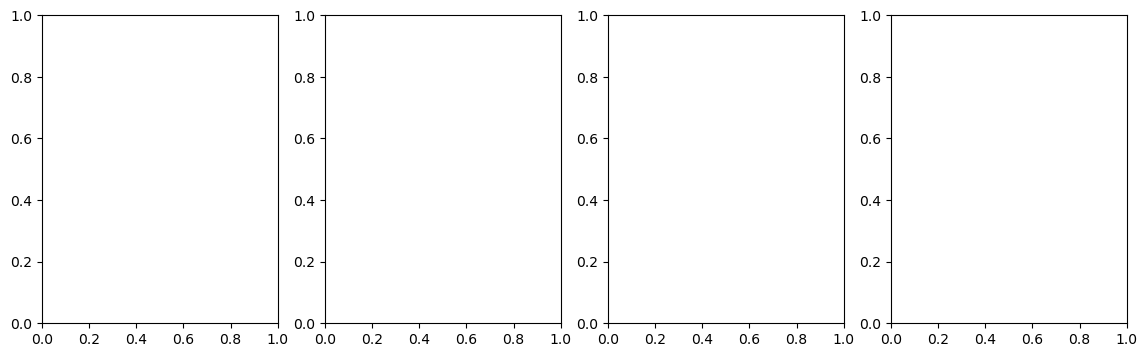

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(14,4))

for adcp_filepath, tcm_filepath in zip(ALL_ADCP[0:4], ALL_TCM[0:4]):

    # Load adcp and tcm files
    ds_adcp = adcp.open_dataset(adcp_filepath)
    df_tcm = tcm.read_csv(tcm_filepath)

    # Trim tcm files

    # Estimate adcp altitude, assuming transduce is ~0.5m above bottom
    ds_adcp["xducer_altitude"] = (ds_adcp["xducer_depth"] + 0.5) - np.max(ds_adcp["depth"])

    # Select deepest adcp current measurement
    ds_adcp = ds_adcp.sel(depth=np.max(ds_adcp["depth"]))
    ds_adcp = ds_adcp.dropna("time")
    df_adcp = ds_adcp.to_pandas()

    # Interpolate tcm speed and direction onto adcp timeseries
    # Note: tcm measures current once per minute, while adcp current is once
    #       every 5 minutes
    df_adcp["speed_tcm"] = np.interp(df_adcp.index, df_tcm.index, df_tcm["speed"])
    df_adcp["dir_tcm"] = np.interp(df_adcp.index, df_tcm.index, df_tcm["dir"])

    

    